Here, we use Elastic Nets to fit the model. Elastic Nets use a combination of L1 and L2 regularizations

In [2]:
# Imports
import pickle
from cross_validate import CrossValidation
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
x_train = pickle.load(open("x_train.p", "rb"))
y_train = pickle.load(open("y_train.p", "rb"))

In [4]:
# Fits a Elastic Net with the attributes of C and loss
# Uses x_data and y_data to fit the Elastic Net
# Employs k_fold_cross_validation to determine the test error
# The average accuracy of the Elastic Net with k_fold_cross_validation is returned
def run_net(x_data, y_data, k_fold_cross_validation, loss, alpha, l1_ratio):    
    cross_validated_data = CrossValidation(x_data, y_data, k_fold_cross_validation)
    
    accuracies = []
    
    for i in range(k_fold_cross_validation):
        x_train, y_train = cross_validated_data.get_other_partitions(i)
        x_test, y_test = cross_validated_data.get_partition(i)
        
        svc = SGDClassifier(loss = loss, penalty = "elasticnet", alpha = alpha, l1_ratio = l1_ratio, \
                            max_iter = 2500, tol = 1e-3)
        svc.fit(x_train, y_train)
        accuracies.append(svc.score(x_test, y_test))
        
    average_accuracy = np.mean(accuracies)
    return average_accuracy

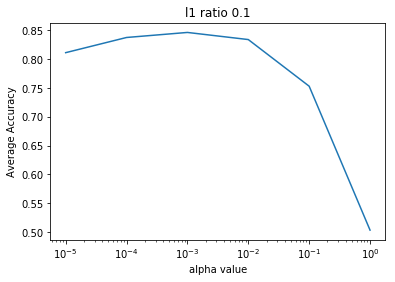

Best accuracy for 0.1 was 0.8463 using a = 0.001



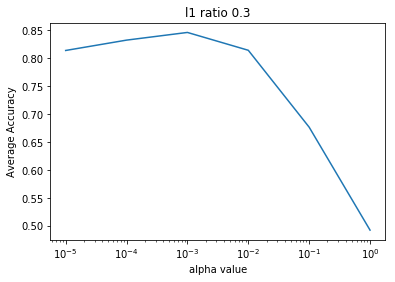

Best accuracy for 0.3 was 0.84645 using a = 0.001



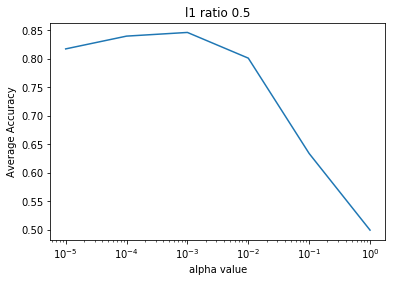

Best accuracy for 0.5 was 0.84605 using a = 0.001



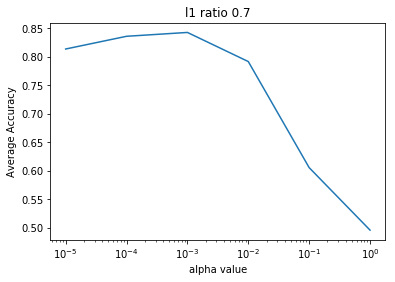

Best accuracy for 0.7 was 0.84235 using a = 0.001



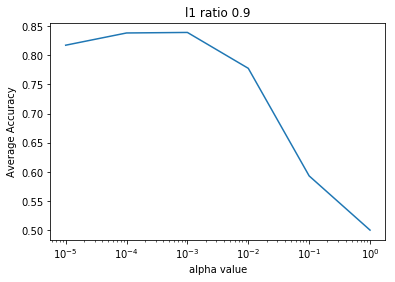

Best accuracy for 0.9 was 0.839 using a = 0.001



In [23]:
# Fit the various models

# Generate the different parameters to use
a_list = np.logspace(-5, 0, 6)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

for l1 in l1_ratios:
    scores = []
    best_score = 0
    best_a = -1
    
    for a in a_list:
        score = run_net(x_train, y_train, 10, "hinge", a, l1)
        
        if score > best_score:
            best_score = score
            best_a = a
            
        scores.append(score)
        
    plt.plot(a_list, scores)
    plt.xlabel("alpha value")
    plt.ylabel("Average Accuracy")
    plt.xscale("log")
    plt.title("l1 ratio " + str(l1))
    plt.show()
    
    print("Best accuracy for " + str(l1) + " was " + str(best_score) + " using a = " + str(best_a))
    print("")

In [7]:
# Import test data
x_test = pickle.load(open("x_test.p", "rb"))

In [8]:
svc = SGDClassifier(loss = "hinge", penalty = "elasticnet", alpha = 0.001, l1_ratio = 0.3, \
                    max_iter = 2500, tol = 1e-3)
svc.fit(x_train, y_train)

predictions = svc.predict(x_test)
ids = range(1, len(predictions) + 1)

output = []
for i in range(len(ids)):
    output.append([ids[i], int(predictions[i])])

# Output the submission file
np.savetxt(open("models/elastic_net.txt", "wb"), output, delimiter = ",", newline = "\n", fmt = "%i", \
           header = "Id,Prediction", comments = "")